<a href="https://colab.research.google.com/github/M20Jay/Data-Science-Portfolio/blob/main/Sales-Data-Exploration-and-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1: Importing Necessary Libraries, Data Loading and Filtering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Question 1: Data Loading and Filtering
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical visualizations
from scipy import stats  # For statistical calculations

In [ ]:
path = "/content/drive/MyDrive/Python Dataset/Datasets/Superstore_dataset_New.csv"

In [ ]:
# Load dataset
data = pd.read_csv(path)

In [ ]:
# Identify columns in the data
print('\nColumn Names')
data.columns.tolist()


Column Names


['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [ ]:
# Select only relevant columns for analysis
df=data[['Sales', 'Profit', 'Quantity', 'Discount']]


In [ ]:
# Checking the first few rows
print("First 5 rows of data:")
df.head(5)


First 5 rows of data:


,Sales,Profit,Quantity,Discount
0,261.9600,41.9136,2.0,0.00
1,731.9400,219.5820,3.0,0.00
2,14.6200,6.8714,2.0,0.00
3,957.5775,-383.0310,5.0,0.45
4,22.3680,2.5164,2.0,0.20


In [ ]:
 #Checking data info (datatypes, non-null count)
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     8995 non-null   float64
 1   Profit    8995 non-null   float64
 2   Quantity  8995 non-null   float64
 3   Discount  9994 non-null   float64
dtypes: float64(4)
memory usage: 312.4 KB
None


**Question 2: Initial Data Analysis**

In [ ]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
              Sales       Profit     Quantity     Discount
count   8995.000000  8995.000000  8995.000000  9994.000000
mean     228.113064    29.152067     3.783324     0.156203
std      628.012276   239.964124     2.207662     0.206452
min        0.444000 -6599.978000     1.000000     0.000000
25%       17.120000     1.724800     2.000000     0.000000
50%       53.952000     8.611200     3.000000     0.200000
75%      209.534000    29.139950     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.800000


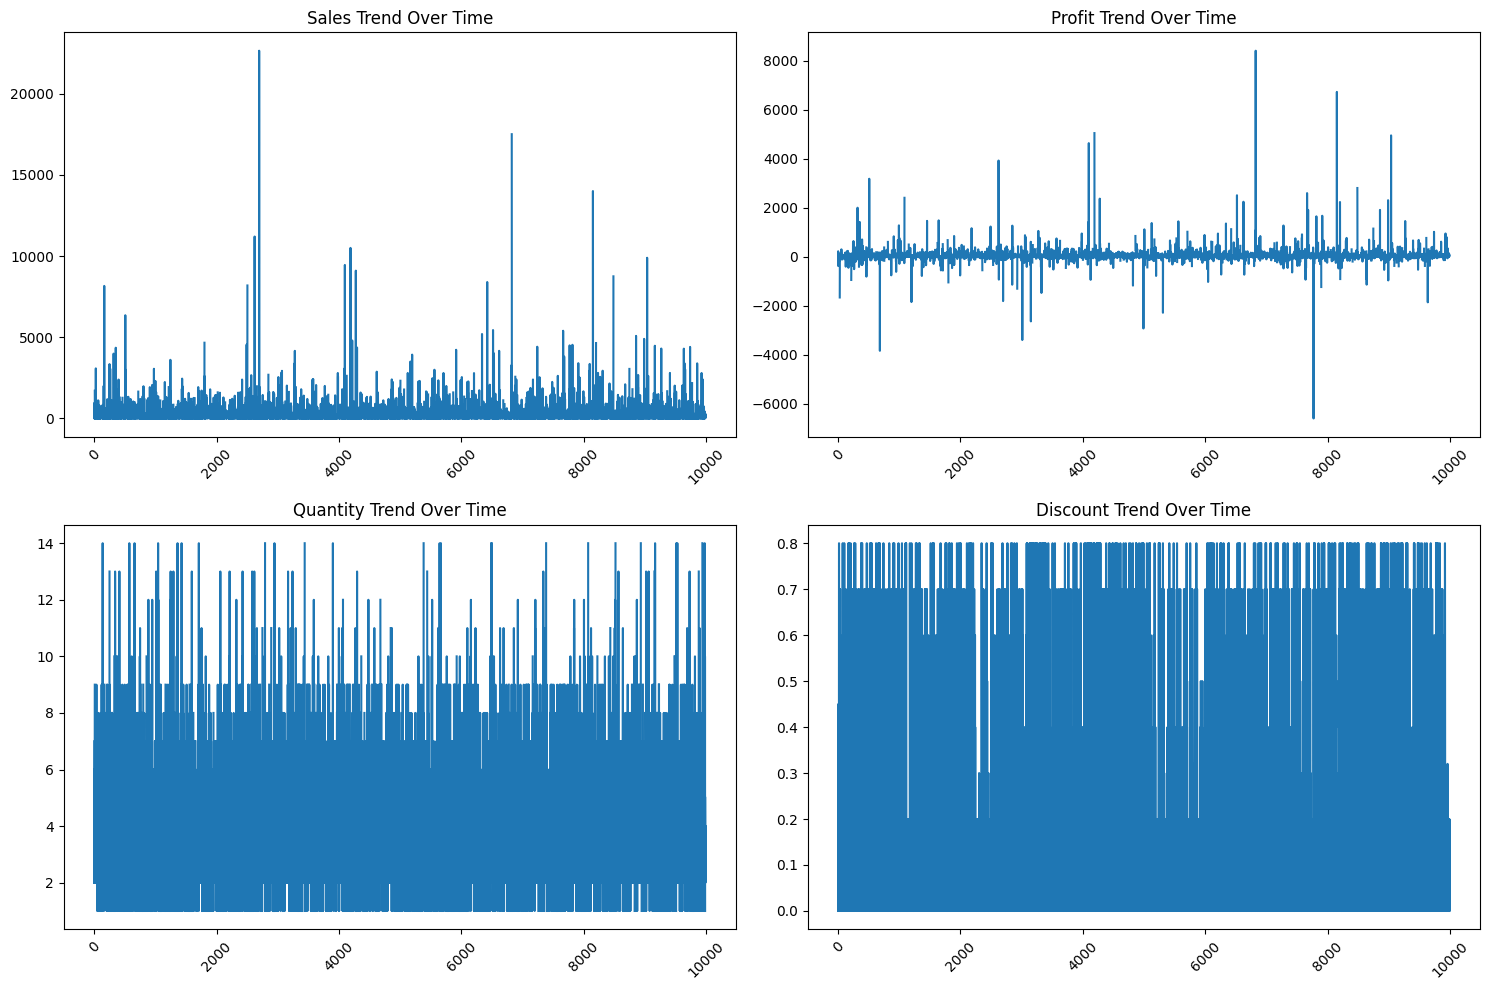

In [ ]:
# Time series plot for trends
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(df[column])
    plt.title(f'{column} Trend Over Time')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Question 3: Missing Values Identification**


Missing Values Count:
Sales       999
Profit      999
Quantity    999
Discount      0
dtype: int64


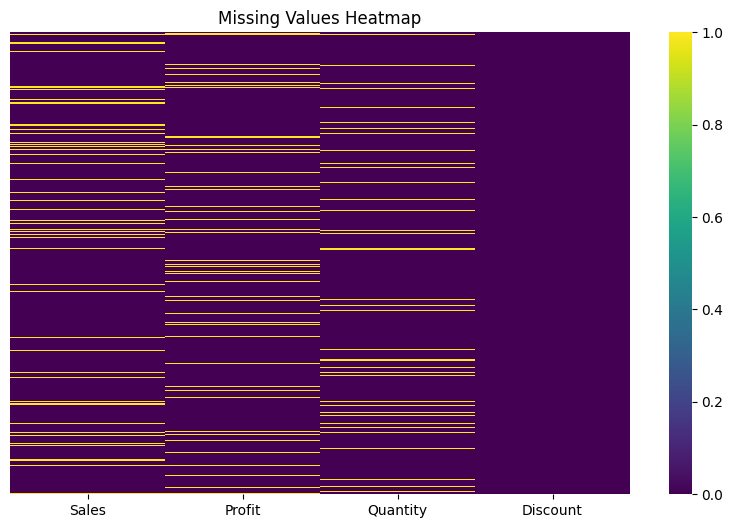

In [ ]:
# Check missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Question 4: Missing Values Treatment**

In [ ]:
# Handle missing values
df_cleaned = df.copy()

# Method 1: Mean imputation
df_cleaned = df_cleaned.fillna(df_cleaned.mean())

# Method 2: Forward fill (alternative)
# df_cleaned = df_cleaned.fillna(method='ffill')

print("\nVerify missing values after cleaning:")
print(df_cleaned.isnull().sum())


Verify missing values after cleaning:
Sales       0
Profit      0
Quantity    0
Discount    0
dtype: int64


**Question 5: Moving Average Analysis**

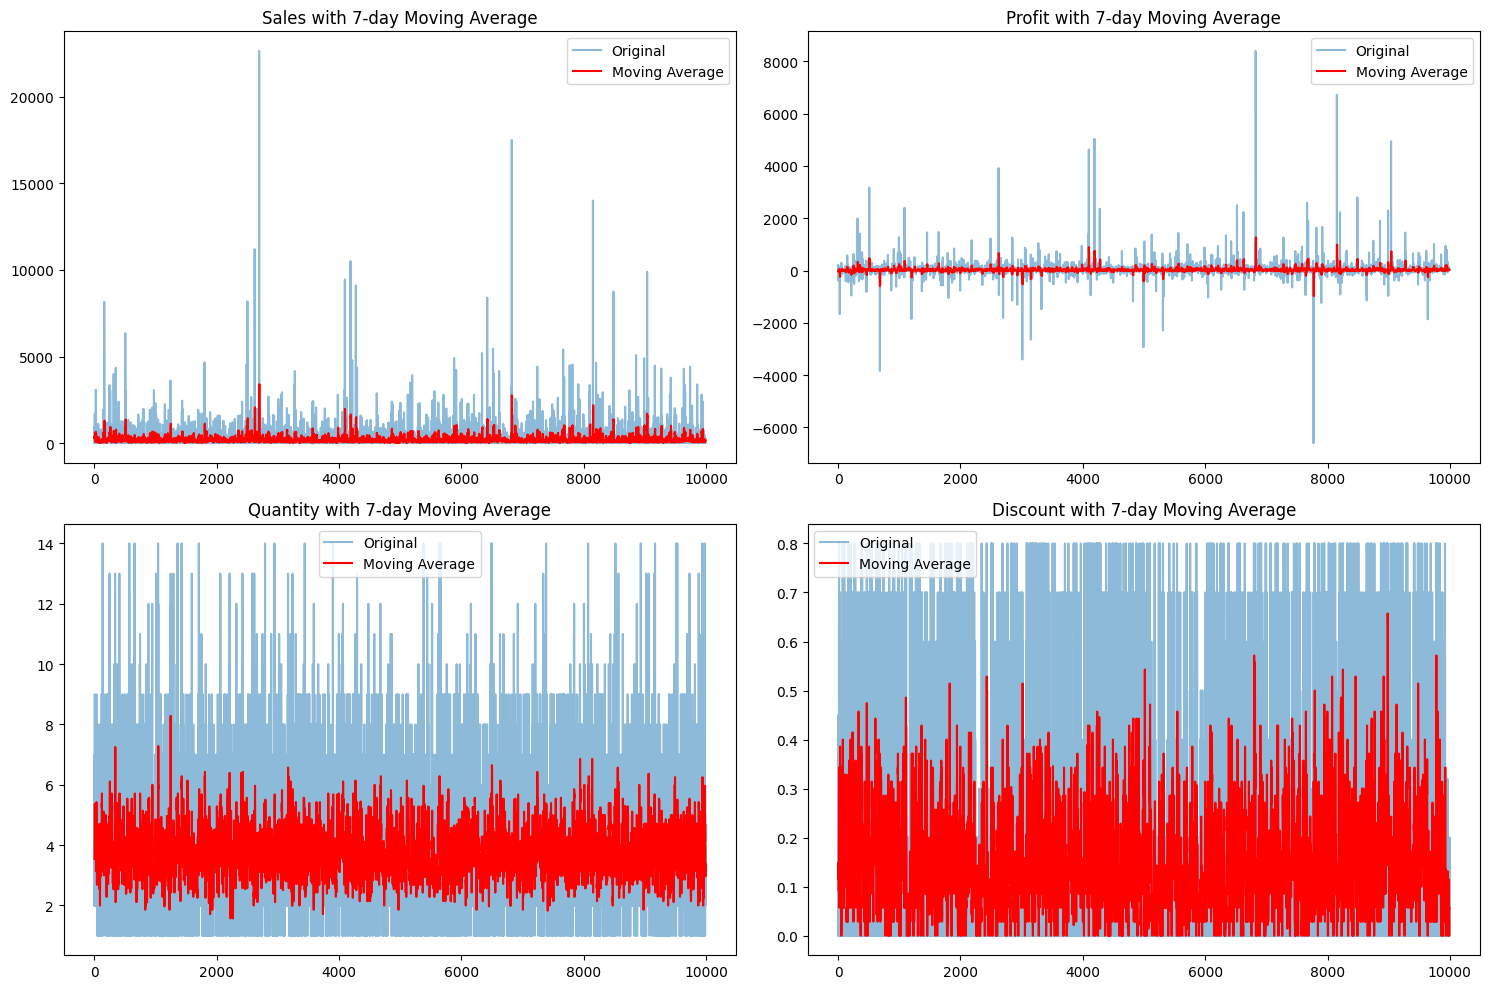

In [ ]:
# Calculate moving average
window_size = 7  # One week window
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(df_cleaned[column], label='Original', alpha=0.5)
    plt.plot(df_cleaned[column].rolling(window=window_size).mean(),
             label='Moving Average', color='red')
    plt.title(f'{column} with {window_size}-day Moving Average')
    plt.legend()
plt.tight_layout()
plt.show()

**Question 6: Outlier Analysis**

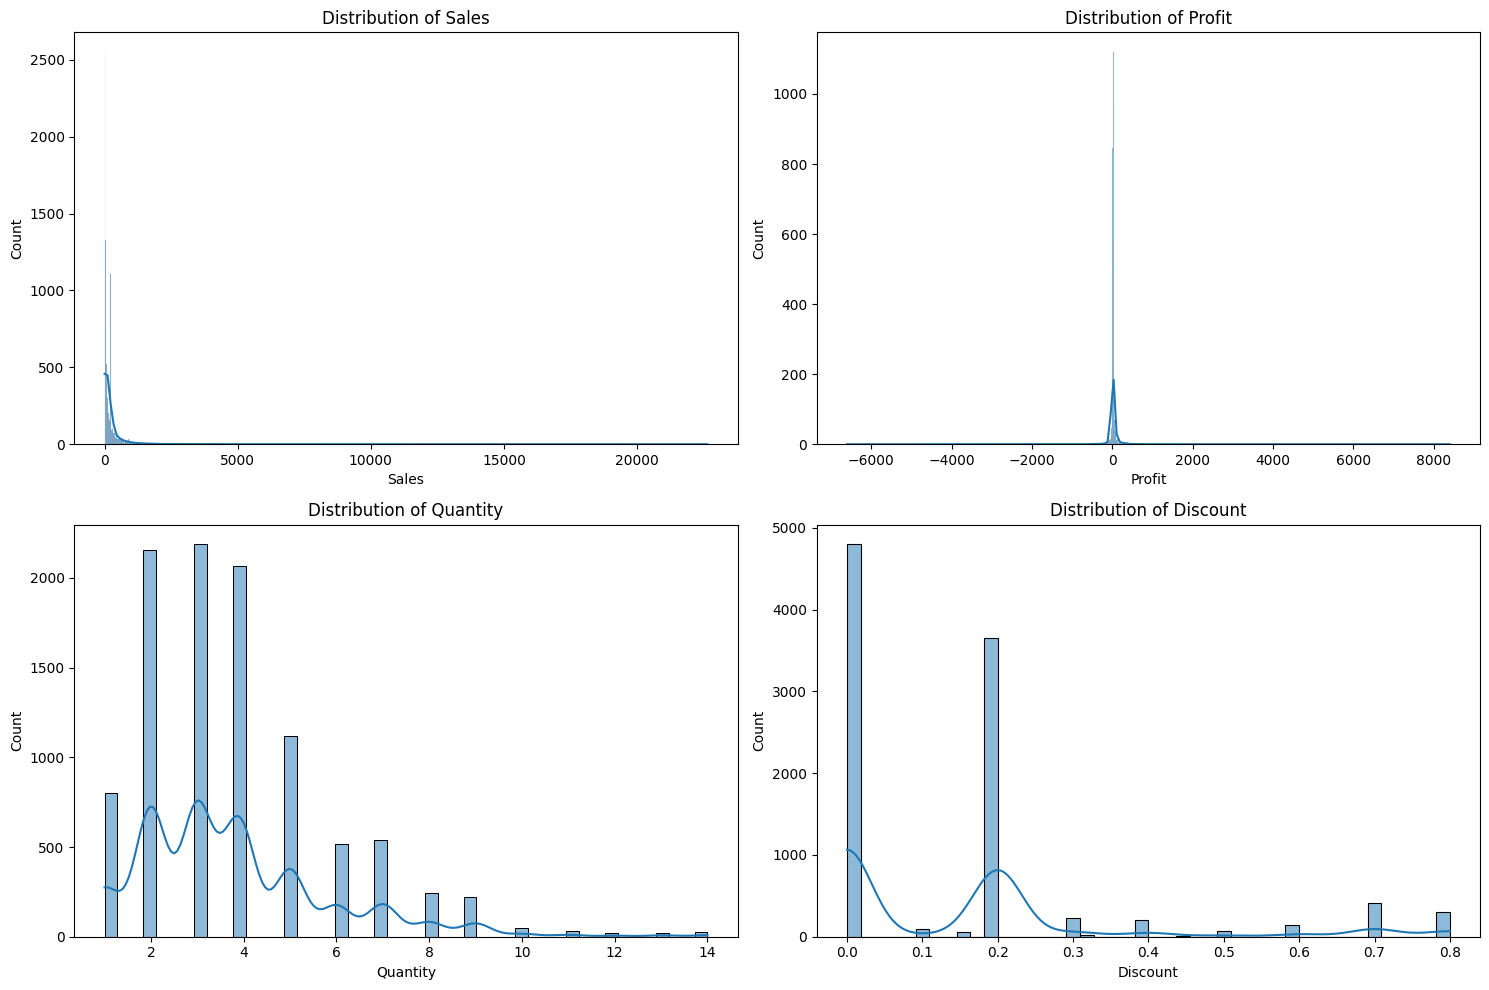


Outliers in Sales: 954

Outliers in Profit: 1728

Outliers in Quantity: 145

Outliers in Discount: 856


In [ ]:
#Create histograms for outlier detection
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_cleaned.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_cleaned[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
for column in df_cleaned.columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cleaned[(df_cleaned[column] < (Q1 - 1.5 * IQR)) |
                         (df_cleaned[column] > (Q3 + 1.5 * IQR))]
    print(f"\nOutliers in {column}: {len(outliers)}")

**Question 7: Correlation Analysis**

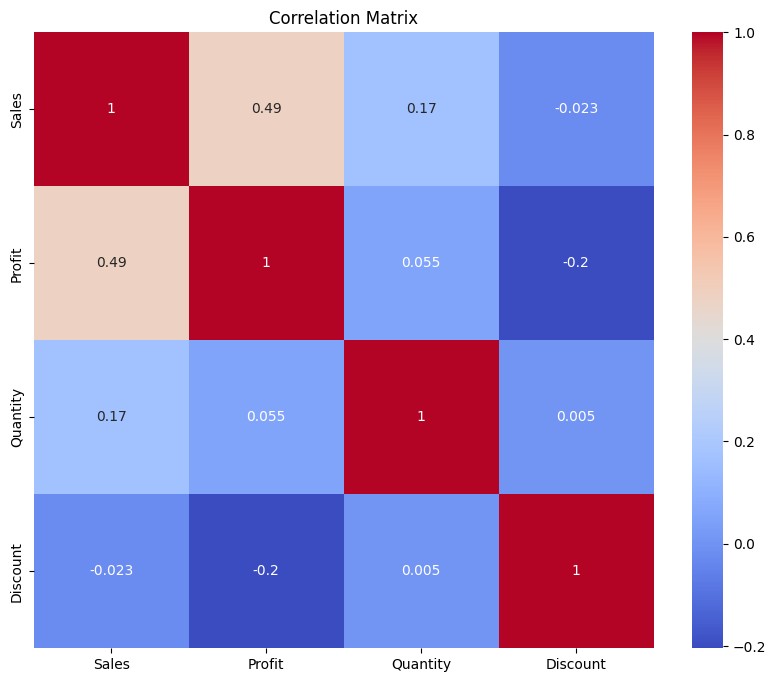


Detailed Correlations:
Profit vs Sales: 0.486
Profit vs Quantity: 0.055
Quantity vs Sales: 0.168
Discount vs Sales: -0.023
Discount vs Profit: -0.204
Discount vs Quantity: 0.005


In [ ]:
# Create correlation matrix
correlation = df_cleaned.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Print detailed correlations
print("\nDetailed Correlations:")
for col1 in df_cleaned.columns:
    for col2 in df_cleaned.columns:
        if col1 < col2:
            corr = df_cleaned[col1].corr(df_cleaned[col2])
            print(f"{col1} vs {col2}: {corr:.3f}")

**Question 8: Impact Analysis**

In [ ]:
# Compare statistics before and after cleaning
print("Original Data Statistics:")
print(df.describe())
print("\nCleaned Data Statistics:")
print(df_cleaned.describe())

# Calculate percentage changes
for column in df_cleaned.columns:
    original_mean = df[column].mean()
    cleaned_mean = df_cleaned[column].mean()
    change = ((cleaned_mean - original_mean) / original_mean) * 100
    print(f"\n{column} mean change after cleaning: {change:.2f}%")

Original Data Statistics:
              Sales       Profit     Quantity     Discount
count   8995.000000  8995.000000  8995.000000  9994.000000
mean     228.113064    29.152067     3.783324     0.156203
std      628.012276   239.964124     2.207662     0.206452
min        0.444000 -6599.978000     1.000000     0.000000
25%       17.120000     1.724800     2.000000     0.000000
50%       53.952000     8.611200     3.000000     0.200000
75%      209.534000    29.139950     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.800000

Cleaned Data Statistics:
              Sales       Profit     Quantity     Discount
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     228.113064    29.152067     3.783324     0.156203
std      595.794693   227.653754     2.094407     0.206452
min        0.444000 -6599.978000     1.000000     0.000000
25%       19.440000     2.382750     2.000000     0.000000
50%       70.620000    10.886400     3.000000     0.200000
75% 